In [4]:
import pandas as pd
import numpy as np
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# This section reads all data files and writes into a single dataframe, then deletes unwated column and writes cleaned dataframe into a csv

In [5]:
# all_year_h1_df = pd.DataFrame()
# for f in glob.glob("data\H*.xlsx"):
#     df = pd.read_excel(f)
#     all_year_h1_df = all_year_h1_df.append(df,ignore_index=True)

In [37]:
# #list of columns to be deleted
# dr_col=["AGENT_ATTORNEY_CITY","AGENT_ATTORNEY_NAME", "AGENT_ATTORNEY_STATE",
#        "AGENT_REPRESENTING_EMPLOYER","CASE_NUMBER","EMPLOYER_PROVINCE", "EMPLOYER_PHONE_EXT",
#         "AGENT_REPRESENTING_EMPLOYER","AGENT_ATTORNEY_NAME","AGENT_ATTORNEY_CITY",
#         "AGENT_ATTORNEY_STATE","SOC_CODE","NAICS_CODE","LABOR_CON_AGREE",
#         "PUBLIC_DISCLOSURE_LOCATION","ORIGINAL_CERT_DATE","EMPLOYER_ADDRESS1", "EMPLOYER_ADDRESS2","EMPLOYER_BUSINESS_DBA",
#         "EMPLOYER_PHONE","EMPLOYER_PHONE_EXT","EMPLOYER_POSTAL_CODE", "EMPLOYER_PROVINCE", "EMPLOYER_STATE",
#         "LCA_CASE_WORKLOC1_CITY","LCA_CASE_WORKLOC1_STATE", "LCA_CASE_WORKLOC2_CITY","CHANGE_EMPLOYER",
#        "CHANGE_PREVIOUS_EMPLOYMENT", "CONTINUED_EMPLOYMENT", "DECISION_DATE",
#        "EMPLOYER_ADDRESS", "EMPLOYER_CITY", "EMPLOYER_COUNTRY","FULL_TIME_POS",'LCA_CASE_EMPLOYER_ADDRESS',
#        'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_EMPLOYER_STATE',       
#        'LCA_CASE_JOB_TITLE', 'LCA_CASE_NAICS_CODE', 'LCA_CASE_NUMBER',
#        'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_SUBMIT',
#        'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO',
#        'LCA_CASE_WAGE_RATE_UNIT', 'LCA_CASE_WORKLOC2_STATE', 'NAIC_CODE',
#         'NEW_CONCURRENT_EMP', 'NEW_CONCURRENT_EMPLOYMENT', 'NEW_EMPLOYMENT',
#        'OTHER_WAGE_SOURCE_1', 'OTHER_WAGE_SOURCE_2','PW_1',
#        'PW_2', 'PW_SOURCE', 'PW_SOURCE_1', 'PW_SOURCE_2', 'PW_SOURCE_OTHER',
#        'PW_SOURCE_YEAR', 'PW_UNIT_1', 'PW_UNIT_2','PW_WAGE_LEVEL', 'PW_WAGE_SOURCE', 'PW_WAGE_SOURCE_OTHER',
#        'PW_WAGE_SOURCE_YEAR', 'SOC_NAME', 'STATUS', 'SUPPORT_H1B',
#        'TOTAL WORKERS', 'TOTAL_WORKERS', 'WAGE_RATE_OF_PAY',
#        'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY','WORKSITE_COUNTY', 'WORKSITE_POSTAL_CODE', 'WORKSITE_STATE',
#        'YR_SOURCE_PUB_1', 'YR_SOURCE_PUB_2','H-1B_DEPENDENT','AMENDED_PETITION','CASE_SUBMITTED','WORKSITE_CITY']


# #delete/drop columns from above list
# all_year_h1_df = all_year_h1_df.drop(dr_col,axis=1)
# all_year_h1_df.drop( all_year_h1_df[ all_year_h1_df['EMPLOYMENT_START_DATE'] == '09/31/2015' ].index , inplace=True)

In [38]:
# all_year_h1_df.to_csv("alldata.csv")

# Loading csv saved above

In [39]:
all_year_h1_df = pd.read_csv("alldata.csv")

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,5,6,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
all_year_h1_df.dropna(how='all')
all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYER_NAME"])
all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_START_DATE"])
all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_END_DATE"])

In [41]:
all_year_h1_df.CASE_STATUS.value_counts() / len(all_year_h1_df)

CERTIFIED              0.731488
CERTIFIED-WITHDRAWN    0.059662
WITHDRAWN              0.027200
DENIED                 0.012162
Name: CASE_STATUS, dtype: float64

In [43]:
all_year_h1_df["WILLFUL_VIOLATOR"].fillna("Y")
all_year_h1_df.loc[all_year_h1_df['CASE_STATUS']=="CERTIFIED", 'WILLFUL_VIOLATOR'] = "N"

all_year_h1_df["FULL_TIME_POSITION"].fillna("N")
all_year_h1_df.loc[all_year_h1_df['CASE_STATUS']=="CERTIFIED", 'FULL_TIME_POSITION'] = "Y"


In [44]:
all_year_h1_df['CASE_STATUS'].value_counts()

CERTIFIED              2241978
CERTIFIED-WITHDRAWN     182862
WITHDRAWN                83367
DENIED                   37277
Name: CASE_STATUS, dtype: int64

In [45]:
all_year_h1_df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYMENT_END_DATE',
       'EMPLOYMENT_START_DATE', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'JOB_TITLE', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'VISA_CLASS',
       'WILLFUL_VIOLATOR'],
      dtype='object')

In [46]:
all_year_h1_df.shape

(3064957, 12)

In [47]:
del all_year_h1_df['Unnamed: 0']

In [48]:
all_year_h1_df['H1B_DEPENDENT'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [49]:
all_year_h1_df['CASE_STATUS'] = np.where(all_year_h1_df['CASE_STATUS']=="CERTIFIED", 1,0) 
all_year_h1_df['FULL_TIME_POSITION'] = np.where(all_year_h1_df['FULL_TIME_POSITION']=="Y", 1,0) 
all_year_h1_df['WILLFUL_VIOLATOR'] = np.where(all_year_h1_df['WILLFUL_VIOLATOR']=="Y", 1,0) 
                                 


In [50]:
all_year_h1_df.H1B_DEPENDENT.unique()
all_year_h1_df["H1B_DEPENDENT"].fillna(0)
all_year_h1_df['H1B_DEPENDENT'] = np.where(all_year_h1_df['H1B_DEPENDENT'].str.contains("Y"), 1,0) 

In [51]:
all_year_h1_df.VISA_CLASS.unique()

array(['H-1B', 'H-1B1 Chile', 'H-1B1 Singapore', 'E-3 Australian'],
      dtype=object)

In [52]:
del all_year_h1_df['VISA_CLASS']

In [53]:
all_year_h1_df.PW_UNIT_OF_PAY.unique()

array(['Year', 'Hour', 'Month', 'Week', nan, 'Bi-Weekly'], dtype=object)

In [54]:
conditions = [
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Hour")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Month")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Week")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Bi-Weekly")) & (all_year_h1_df['PREVAILING_WAGE']>0 )]
     
choices = [(all_year_h1_df['PREVAILING_WAGE'] * 2000), 
           (all_year_h1_df['PREVAILING_WAGE'] * 12), 
           (all_year_h1_df['PREVAILING_WAGE'] * 50),
            (all_year_h1_df['PREVAILING_WAGE'] * 25)]
all_year_h1_df['PWAGE'] = np.select(conditions, choices, default = all_year_h1_df['PREVAILING_WAGE'])

In [55]:
del all_year_h1_df['PREVAILING_WAGE']
del all_year_h1_df['PW_UNIT_OF_PAY']

In [56]:
print(len(all_year_h1_df.JOB_TITLE.unique()))

261524


In [57]:
all_year_h1_df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE
0,0,"MEDTRONIC, INC.",02/28/2015,02/09/2015,1,1,MECHANICAL ENGINEER,0,19000.0
1,1,UNIVERSITY OF OKLAHOMA,01/04/2018,01/05/2015,1,1,ASSISTANT PROFESSOR,0,42860.0
2,0,NOKIA INC.,01/06/2016,01/07/2013,1,1,RELEASE AND SOFTWARE TEST MANAGER,0,73965.0
3,1,"OMRON OILFIELD AND MARINE, INC.",09/07/2018,09/07/2015,1,1,CONTROL ENGINEERING SPECIALIST,0,65998.0
4,1,FEDERAL HOME LOAN MORTGAGE CO.,06/05/2018,06/06/2015,1,1,DEVELOPMENT SENIOR,0,96907.0
5,0,"APLARS, LLC",01/25/2016,01/25/2015,1,1,BUSINESS ANALYST,0,20000.0
6,1,"VMWARE, INC.",11/02/2017,11/03/2014,1,1,STAFF ENGINEER,0,133976.0
7,1,FEDERAL HOME LOAN MORTGAGE CORPORATION,06/13/2018,06/14/2015,1,1,CREDIT GUARANTEE ANALYTICS SENIOR,0,64085.0
8,1,"VMWARE, INC.",11/16/2017,11/17/2014,1,1,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,0,101900.0
9,0,IMAEX TRADING COMPANY,09/17/2018,09/17/2015,0,1,COST ACCOUNTANT,0,44920.0


In [58]:
all_year_h1_df.head(10)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE
0,0,"MEDTRONIC, INC.",02/28/2015,02/09/2015,1,1,MECHANICAL ENGINEER,0,19000.0
1,1,UNIVERSITY OF OKLAHOMA,01/04/2018,01/05/2015,1,1,ASSISTANT PROFESSOR,0,42860.0
2,0,NOKIA INC.,01/06/2016,01/07/2013,1,1,RELEASE AND SOFTWARE TEST MANAGER,0,73965.0
3,1,"OMRON OILFIELD AND MARINE, INC.",09/07/2018,09/07/2015,1,1,CONTROL ENGINEERING SPECIALIST,0,65998.0
4,1,FEDERAL HOME LOAN MORTGAGE CO.,06/05/2018,06/06/2015,1,1,DEVELOPMENT SENIOR,0,96907.0
5,0,"APLARS, LLC",01/25/2016,01/25/2015,1,1,BUSINESS ANALYST,0,20000.0
6,1,"VMWARE, INC.",11/02/2017,11/03/2014,1,1,STAFF ENGINEER,0,133976.0
7,1,FEDERAL HOME LOAN MORTGAGE CORPORATION,06/13/2018,06/14/2015,1,1,CREDIT GUARANTEE ANALYTICS SENIOR,0,64085.0
8,1,"VMWARE, INC.",11/16/2017,11/17/2014,1,1,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,0,101900.0
9,0,IMAEX TRADING COMPANY,09/17/2018,09/17/2015,0,1,COST ACCOUNTANT,0,44920.0


In [59]:
# all_year_h1_df.sort(['PWAGE'], ascending=False)
all_year_h1_df[all_year_h1_df.CASE_STATUS == 1].sort_values(['PWAGE'], ascending=False)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE
362708,1,"SOAPROJECTS, INC",09/15/2018,09/15/2015,1,1,"SR. MANAGER, SOX & INTERNAL AUDIT GROUP",0,174262000.0
244964,1,"PERDUE FARMS, INC.",08/31/2018,09/01/2015,1,1,"MANAGER, GEORGIAN, CAUCASUS, AND EASTERN EUROP...",0,118352000.0
156096,1,APPNEXUS,08/05/2018,08/05/2015,1,1,ENGINEERING QUALITY ANALYST (15-1199.0),0,96096000.0
754355,1,BIRLASOFT INC,2019-03-07 00:00:00,2016-03-07 00:00:00,1,1,SYSTEMS ANALYSTS,0,87692000.0
222101,1,OPENLINK FINANCIAL LLC,08/31/2018,09/01/2015,1,1,SALESFORCE DEVELOPER,0,4076800.0
477507,1,"FILA U.S.A., INC.",09/30/2018,09/30/2015,1,1,CHIEF EXECUTIVE OFFICER,0,680000.0
615707,1,LNG MANAGEMENT SERVICES LLC,06/21/2017,06/22/2015,1,1,CHIEF EXECUTIVE OFFICER (CEO),0,665400.0
619351,1,"SAATCHI & SAATCHI NORTH AMERICA, INC.",2018-06-17 00:00:00,2016-06-17 00:00:00,1,1,CHIEF CREATIVE OFFICER,0,631700.0
1952364,1,PRATT INSTITUTE,2018-05-31 00:00:00,2018-01-01 00:00:00,1,0,VISITING ASSOCIATE PROFESSOR,0,600000.0
506706,1,BILLINGS CLINIC,08/26/2015,08/13/2015,1,1,NEUROSURGEON,0,575000.0


In [60]:
all_year_h1_df['PWAGE'] = all_year_h1_df['PWAGE'].fillna(all_year_h1_df['PWAGE'].mean())

In [61]:
all_year_h1_df = all_year_h1_df[all_year_h1_df.EMPLOYMENT_START_DATE != '09/31/2015']

In [62]:
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%Y/%m/%d', '%d/%m/%Y', '%m/%d/%Y','%Y-%m-%d %H:%M:%S'):
        try:            
            return pd.to_datetime(text).strftime(fmt)
        except ValueError:
            pass
            raise ValueError(text)
    
    
all_year_h1_df['EmpStart_date'] = all_year_h1_df['EMPLOYMENT_START_DATE'].apply(lambda x: try_parsing_date(x))
all_year_h1_df['EmpEnd_date'] = all_year_h1_df['EMPLOYMENT_END_DATE'].apply(lambda x: try_parsing_date(x))

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [63]:
# all_year_h1_df.dtypes
del all_year_h1_df['EMPLOYMENT_START_DATE']
del all_year_h1_df['EMPLOYMENT_END_DATE']

In [64]:
all_year_h1_df['EMPLOYMENT_DAYS'] = pd.to_datetime(all_year_h1_df['EmpEnd_date']) - pd.to_datetime(all_year_h1_df['EmpStart_date'])

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
# all_year_h1_df['EMPLOYMENT_DAYS'] 

def caldays(d):
    return np.where(d.days > 182.5, 1,0) 

all_year_h1_df['EMPDAYS'] = all_year_h1_df['EMPLOYMENT_DAYS'].apply(lambda x: caldays(x))

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
del all_year_h1_df['EMPLOYMENT_DAYS']

In [67]:
del all_year_h1_df['EmpStart_date']
del all_year_h1_df['EmpEnd_date']

In [68]:
for col in all_year_h1_df.columns:
    print(col,len(all_year_h1_df.loc[all_year_h1_df[col].isna()]))

CASE_STATUS 0
EMPLOYER_NAME 0
FULL_TIME_POSITION 0
H1B_DEPENDENT 0
JOB_TITLE 519481
WILLFUL_VIOLATOR 0
PWAGE 0
EMPDAYS 0


In [69]:
all_year_h1_df.dtypes

CASE_STATUS             int32
EMPLOYER_NAME          object
FULL_TIME_POSITION      int32
H1B_DEPENDENT           int32
JOB_TITLE              object
WILLFUL_VIOLATOR        int32
PWAGE                 float64
EMPDAYS                 int64
dtype: object

# This needs to be corrected

In [ ]:
# dump a pickle of your DataFrame
all_year_h1_df.to_pickle("cleandata.pkl")

In [ ]:
# pickle.load on your dataframe 

In [ ]:
# sns.violinplot(x="EMPLOYER_NAME", y="CASE_STATUS", data=all_year_h1_df)

Text(0.5,1,'Approved count 1 is approved and 0 is denied')

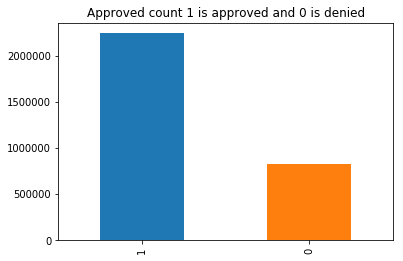

In [70]:
all_year_h1_df.CASE_STATUS.value_counts().plot(kind="bar")
plt.title("Approved count 1 is approved and 0 is denied")

In [71]:
category_cols = ['FULL_TIME_POSITION', 'H1B_DEPENDENT','WILLFUL_VIOLATOR']

In [72]:
number_cols = ['PWAGE','EMPDAYS']

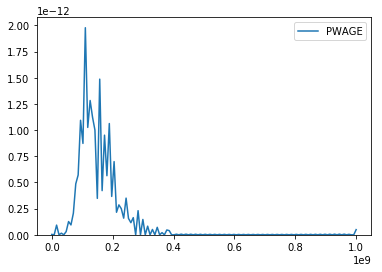

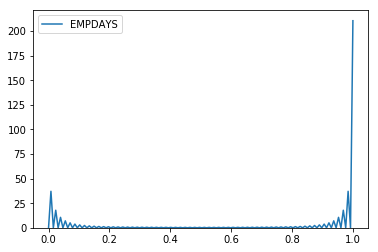

In [73]:
for col in number_cols:
    sns.kdeplot(all_year_h1_df[col])
    plt.show()

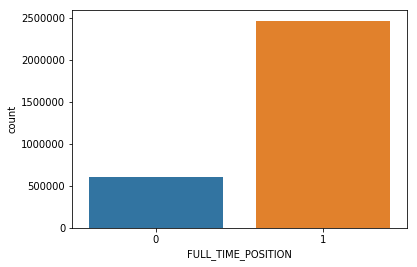

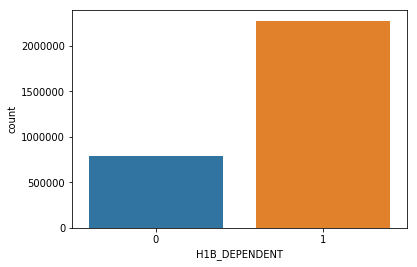

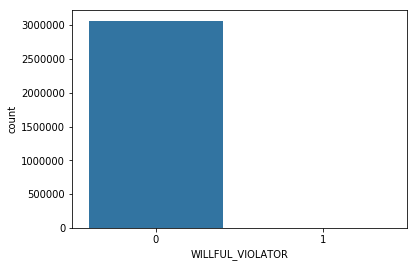

In [74]:
for col in category_cols:
    sns.countplot(col, data=all_year_h1_df)
    plt.show()

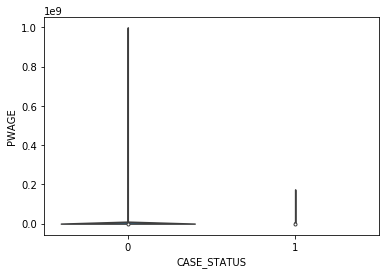

In [75]:
sns.violinplot(x="CASE_STATUS", y="PWAGE", data=all_year_h1_df)

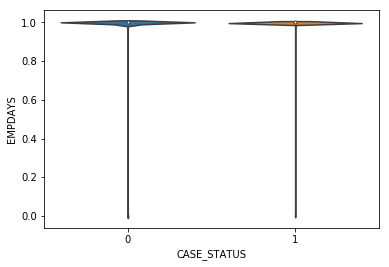

In [76]:
sns.violinplot(x="CASE_STATUS", y="EMPDAYS", data=all_year_h1_df)